# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [12]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Среднее', 'Среднее специальное', 'Высшее', 'Неоконченное высшее', 'Два и более высших образования', 'Неполное среднее'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Другие сферы', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Управляющая компания', 'ЧОП/Детективная д-ть', 'Ресторанный бизнес/Общественное питание', 'Банк/Финансы', 'Наука', 'Логистика', 'Недвижимость', 'Образование', 'Маркетинг', 'Транспорт', 'Страхование', 'Сборочные производства', 'Сельское хозяйство', 'Энергетика', 'Коммунальное хоз-во/Дорожные службы', 'Торговля', 'Здравоохранение', 'Развлечения/Искусство', 'Туризм', 'Салоны красоты и здоровья', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Металлургия/Промышленность/Машиностроение', 'Нефтегазовая промышленность', 'Информационные услуги', 'Строительство', 'Химия/Парфюмерия/Фармацевтика', 'Подбор персонала'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [310]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
# Пропуски есть в полях 
# GEN_INDUSTRY                  
# GEN_TITLE                     
# ORG_TP_STATE                  
# ORG_TP_FCAPITAL              
# JOB_DIR                     
# TP_PROVINCE                  
# REGION_NM                 
# WORK_TIME                     
# PREVIOUS_CARD_NUM_UTILIZED    

In [13]:
df.GEN_INDUSTRY.value_counts()

Торговля                                     4707
Другие сферы                                 3356
Металлургия/Промышленность/Машиностроение    2707
Государственная служба                       2526
Здравоохранение                              2336
Образование                                  2026
Транспорт                                    1567
Сельское хозяйство                           1387
Строительство                                1179
Коммунальное хоз-во/Дорожные службы          1030
Наука                                         783
Ресторанный бизнес/Общественное питание       734
Нефтегазовая промышленность                   430
Сборочные производства                        346
Банк/Финансы                                  326
ЧОП/Детективная д-ть                          294
Развлечения/Искусство                         281
Энергетика                                    271
Салоны красоты и здоровья                     218
Информационные услуги                         198


In [14]:
df[df['GEN_INDUSTRY'].isnull()].shape[0]

2713

In [15]:
df.GEN_TITLE.value_counts()

Специалист                        13981
Рабочий                            6025
Служащий                           1743
Руководитель среднего звена        1396
Работник сферы услуг               1118
Высококвалифиц. специалист         1082
Руководитель высшего звена          841
Индивидуальный предприниматель      436
Другое                              355
Руководитель низшего звена          268
Военнослужащий по контракту         158
Партнер                              17
Name: GEN_TITLE, dtype: int64

In [16]:
df[df['GEN_TITLE'].isnull()].shape[0]

2713

In [17]:
df.ORG_TP_STATE.value_counts()

Частная компания                  12896
Государственная комп./учреж.      12152
Индивидуальный предприниматель     1882
Некоммерческая организация          445
Частная ком. с инос. капиталом       45
Name: ORG_TP_STATE, dtype: int64

In [18]:
df[df['ORG_TP_STATE'].isnull()].shape[0]

2713

In [19]:
df.ORG_TP_FCAPITAL.value_counts()

Без участия    27099
С участием       326
Name: ORG_TP_FCAPITAL, dtype: int64

In [20]:
df[df['ORG_TP_FCAPITAL'].isnull()].shape[0]

2708

In [21]:
df.JOB_DIR.value_counts()

Участие в основ. деятельности    22613
Вспомогательный техперсонал       2091
Бухгалтерия, финансы, планир.      957
Адм-хоз. и трансп. службы          539
Снабжение и сбыт                   433
Служба безопасности                318
Кадровая служба и секретариат      201
Пр-техн. обесп. и телеком.         145
Юридическая служба                 101
Реклама и маркетинг                 22
Name: JOB_DIR, dtype: int64

In [22]:
df[df['JOB_DIR'].isnull()].shape[0]

2713

In [23]:
df.TP_PROVINCE.value_counts()

Краснодарский край         1537
Кемеровская область        1283
Алтайский край              863
Ставропольский край         842
Читинская область           821
Ростовская область          788
Приморский край             786
Челябинская область         712
Кировская область           689
Свердловская область        683
Саратовская область         635
Вологодская область         625
Волгоградская область       624
Воронежская область         582
Красноярский край           576
Омская область              544
Татарстан                   526
Тульская область            507
Оренбургская область        500
Хабаровский край            492
Санкт-Петербург             489
Новосибирская область       477
Самарская область           470
Архангельская область       470
Амурская область            432
Курская область             420
Иркутская область           419
Белгородская область        412
Ярославская область         407
Бурятия                     390
                           ... 
Ханты-Ма

In [24]:
df[df['TP_PROVINCE'].isnull()].shape[0]

590

In [25]:
df.REGION_NM.value_counts()

ЮЖНЫЙ                 4248
ЦЕНТРАЛЬНЫЙ 2         3839
ЗАПАДНО-СИБИРСКИЙ     3616
ЦЕНТРАЛЬНЫЙ 1         3284
ПОВОЛЖСКИЙ            2871
ПРИВОЛЖСКИЙ           2538
ВОСТОЧНО-СИБИРСКИЙ    2471
УРАЛЬСКИЙ             2441
ДАЛЬНЕВОСТОЧНЫЙ       2211
СЕВЕРО-ЗАПАДНЫЙ       2025
ЦЕНТРАЛЬНЫЙ ОФИС       587
Name: REGION_NM, dtype: int64

In [26]:
df[df['REGION_NM'].isnull()].shape[0]

2

In [27]:
df.loc[
    df['REGION_NM'].isnull(), 
    ['REGION_NM', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE']
].T

,3099,17420
REGION_NM,NaN,NaN
REG_ADDRESS_PROVINCE,Новосибирская область,Новосибирская область
FACT_ADDRESS_PROVINCE,Новосибирская область,Новосибирская область
POSTAL_ADDRESS_PROVINCE,Новосибирская область,Новосибирская область


In [28]:
df.loc[
    df['REGION_NM'].isnull() | (df['REG_ADDRESS_PROVINCE'] == 'Новосибирская область'), 
    ['REGION_NM', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE']
]

,REGION_NM,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE
71,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
222,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
240,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
241,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
356,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
413,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
436,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
476,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
667,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
686,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область


In [29]:
df.WORK_TIME.value_counts()

36.0       2436
24.0       2307
60.0       1894
12.0       1696
48.0       1605
72.0       1078
120.0      1063
6.0         911
18.0        827
84.0        826
96.0        773
180.0       617
108.0       552
240.0       434
144.0       396
8.0         376
30.0        372
156.0       327
132.0       324
192.0       281
7.0         279
204.0       274
3.0         262
168.0       259
360.0       243
216.0       232
10.0        225
4.0         224
300.0       220
9.0         204
           ... 
202.0         1
780.0         1
315.0         1
10000.0       1
430.0         1
1728.0        1
232.0         1
265.0         1
1800.0        1
251.0         1
159.0         1
443.0         1
457.0         1
463.0         1
275.0         1
343.0         1
1254.0        1
414.0         1
1120.0        1
127.0         1
560.0         1
337.0         1
458.0         1
350.0         1
519.0         1
201.0         1
391.0         1
398.0         1
117.0         1
469.0         1
Name: WORK_TIME, Length:

In [30]:
df[df['WORK_TIME'].isnull()].shape[0]

2717

In [31]:
df.loc[
    df['WORK_TIME'] == 0, 
    ['WORK_TIME']
].count()

WORK_TIME    0
dtype: int64

In [32]:
df.PREVIOUS_CARD_NUM_UTILIZED.value_counts()

1.0    595
2.0      5
Name: PREVIOUS_CARD_NUM_UTILIZED, dtype: int64

In [33]:
df[df['PREVIOUS_CARD_NUM_UTILIZED'].isnull()].shape[0]

29533

In [ ]:
# ПРЕДЛОЖЕНИЯ (И АРГУМЕНТЫ) ПО ПРОПУСКАМ ДАННЫХ
# 1. Пропуски в полях: GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR и TP_PROVINCE,- 
# заменяем на строки 'Нет данных'
# Причина: событие "незаполнения" некоторых данных можето что-то означать 
# (например, 
# - скрытность опрашиваемого или 
# - невозможность указания поля из-за некоторой корреляции с другим полем: 
# например, для безработного нельзя указать направление фирмы, где он работает)

# 2. Пропуск в поле REGION_NM заменяем на строку 'ЗАПАДНО-СИБИРСКИЙ'
# Причина: таких строк - 2. В них указано: 
# REG_ADDRESS_PROVINCE - Новосибирская область, FACT_ADDRESS_PROVINCE - Новосибирская область, POSTAL_ADDRESS_PROVINCE - Новосибирская область
# Из других данных с такими значениями видно, что REGION_NM = 'ЗАПАДНО-СИБИРСКИЙ'

# 3. Пропуск в поле WORK_TIME заменяем на число 0
# Причина: для безработных это поле не имеет смысла, для работающих отсутствие значения WORK_TIME может означать, что
# опрашиваемый еще не начал работать на новом месте, скрывает стаж или данные не были получены
# Нужен более дктальный анализ
# Пока сведем все эти случаи к одной категории WORK_TIME = 0

# 4. Пропуск в поле PREVIOUS_CARD_NUM_UTILIZED заменяем на число 0
# Ghbxbyf: в самом определении поля PREVIOUS_CARD_NUM_UTILIZED указано, что пустое значение означает 0 карт

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
# Категориальные признаки есть. 
# Это - 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 
# 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM' и 'FAMILY_INCOME'

# Для них можно применить факторизацию pd.factorize

In [34]:
df.FAMILY_INCOME.value_counts()

от 10000 до 20000 руб.    13999
от 20000 до 50000 руб.    11984
от 5000 до 10000 руб.      3067
свыше 50000 руб.            975
до 5000 руб.                108
Name: FAMILY_INCOME, dtype: int64

In [ ]:
# Для признака 'FAMILY_INCOME' можно сделать факторизацию:
# до 5000 руб.  -->   0
# от 5000 до 10000 руб.  -->  5000
# от 10000 до 20000 руб.  -->  10000
# от 20000 до 50000 руб.  -->  20000
# свыше 50000 руб.  -->  50000

# Для всех остальных категориальных признаковних можно применить факторизацию pd.factorize

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [ ]:
#def preproc_data(df_input):
#    df_output = df_input.copy()
    
    
    ## Your Code Here
    
#    return df_output

In [35]:
def preproc_data(df_input):
    df_output = df_input.copy()
    ## Your Code Here
    # 1. Удаление идентификатора AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # 2. Избавление от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    # Заменяем в этих полях запятые на точки и пробуем преобразовать к вещественному типу
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',' , '.')).astype('float32')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',' , '.')).astype('float32')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',' , '.')).astype('float32')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',' , '.')).astype('float32')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',' , '.')).astype('float32')    
    
    # 3. Обработка пропусков
    # 3а. Пропуски в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE заменяем на "Нет_данных"
    df_output.loc[df_output['GEN_INDUSTRY'].isnull(), 'GEN_INDUSTRY'] = 'Нет данных'
    df_output.loc[df_output['GEN_TITLE'].isnull(), 'GEN_TITLE'] = 'Нет данных'
    df_output.loc[df_output['ORG_TP_STATE'].isnull(), 'ORG_TP_STATE'] = 'Нет данных'
    df_output.loc[df_output['ORG_TP_FCAPITAL'].isnull(), 'ORG_TP_FCAPITAL'] = 'Нет данных'
    df_output.loc[df_output['JOB_DIR'].isnull(), 'JOB_DIR'] = 'Нет данных'
    df_output.loc[df_output['TP_PROVINCE'].isnull(), 'TP_PROVINCE'] = 'Нет данных'
    # 3б. Пропуски в поле REGION_NM заменяем на строку 'ЗАПАДНО-СИБИРСКИЙ'
    df_output.loc[df_output['REGION_NM'].isnull(), 'REGION_NM'] = 'ЗАПАДНО-СИБИРСКИЙ'
    # 3в. Пропуски в поле WORK_TIME заменяем на число 0
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = 0
    # 3г. Пропуски в поле PREVIOUS_CARD_NUM_UTILIZED заменяем на число 0
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    
    # 4. Кодировка категориальных признаков
    # 4а. Кодировка признака 'FAMILY_INCOME'
    replace_map = {
        'до 5000 руб.' : 0,
        'от 5000 до 10000 руб.' : 5000,
        'от 10000 до 20000 руб.' : 10000,
        'от 20000 до 50000 руб.' : 20000,
        'свыше 50000 руб.' : 50000
    }
    df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].map(replace_map)
    #df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].map(lambda x: x.replace({'до 5000 руб.' : 0, \
    #    'от 5000 до 10000 руб.' : 5000, 'от 10000 до 20000 руб.' : 10000, 'от 20000 до 50000 руб.' : 20000, \
    #    'свыше 50000 руб.' : 50000})).astype('int64')
    
    # 4б. Кодировка остальных категориальных признаков
    df_output['EDUCATION'] = pd.factorize(df_output['EDUCATION'])[0]
    df_output['MARITAL_STATUS'] = pd.factorize(df_output['MARITAL_STATUS'])[0]
    df_output['GEN_INDUSTRY'] = pd.factorize(df_output['GEN_INDUSTRY'])[0]
    df_output['GEN_TITLE'] = pd.factorize(df_output['GEN_TITLE'])[0]
    df_output['ORG_TP_STATE'] = pd.factorize(df_output['ORG_TP_STATE'])[0]
    df_output['ORG_TP_FCAPITAL'] = pd.factorize(df_output['ORG_TP_FCAPITAL'])[0]
    df_output['JOB_DIR'] = pd.factorize(df_output['JOB_DIR'])[0]
    df_output['REG_ADDRESS_PROVINCE'] = pd.factorize(df_output['REG_ADDRESS_PROVINCE'])[0]
    df_output['FACT_ADDRESS_PROVINCE'] = pd.factorize(df_output['FACT_ADDRESS_PROVINCE'])[0]
    df_output['POSTAL_ADDRESS_PROVINCE'] = pd.factorize(df_output['POSTAL_ADDRESS_PROVINCE'])[0]
    df_output['TP_PROVINCE'] = pd.factorize(df_output['TP_PROVINCE'])[0]
    df_output['REGION_NM'] = pd.factorize(df_output['REGION_NM'])[0]
    
    # 5. Перемешивание строк
    #from sklearn.utils import shuffle
    #for i in range(1,50):
    #    df_output = shuffle(df_output)
        
    # 6. Удаление незначимых признаков
    #cols = ['ORG_TP_FCAPITAL', 'ORG_TP_STATE', 'REG_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','REG_FACT_FL',\
    #        'FACT_POST_FL','REG_POST_FL','REG_FACT_POST_FL','REG_FACT_POST_TP_FL','OWN_AUTO','DL_DOCUMENT_FL',\
    #        'GPF_DOCUMENT_FL','FACT_LIVING_TERM','WORK_TIME','FACT_PHONE_FL', 'REG_PHONE_FL','GEN_PHONE_FL', 'LOAN_MAX_DLQ',\
    #       'PREVIOUS_CARD_NUM_UTILIZED']
    #df_output = df_output.drop(cols, axis=1).reset_index(drop='True')
    #cols2 = ['SOCSTATUS_WORK_FL','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT']
    #df_output = df_output.drop(cols2, axis=1).reset_index(drop='True')
    #(не помогает !)

    return df_output

In [36]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [37]:
X = df_train_preproc.drop(['TARGET'], axis=1).reset_index(drop='True')
X_test = df_test_preproc.drop(['TARGET'], axis=1).reset_index(drop='True')
y = df_train_preproc['TARGET'].reset_index(drop='True')
y_test = df_test_preproc['TARGET'].reset_index(drop='True')

In [38]:
k0 = 0
k1 = 0
all = 0
for value in y:
    if value == 0:
        k0 +=1
    elif value == 1:
        k1 +=1
    all += 1
print ('нулей: ', k0)
print ('единиц: ', k1, '(', k1*100/all, '% )')
print ('всего: ', all)

нулей:  13411
единиц:  1812 ( 11.90304145043684 % )
всего:  15223


In [39]:
k0 = 0
k1 = 0
all = 0
for value in y_test:
    if value == 0:
        k0 +=1
    elif value == 1:
        k1 +=1
    all += 1
print ('нулей: ', k0)
print ('единиц: ', k1, '(', k1*100/all, '% )')
print ('всего: ', all)

нулей:  13160
единиц:  1750 ( 11.737089201877934 % )
всего:  14910


#### Задание 5. Обучение и оценка качества разных моделей

In [437]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here


In [40]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [41]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here


In [44]:
# ===================================================================================

In [45]:
from sklearn.cross_validation import train_test_split

In [46]:
X_train, X_test_KV, y_train, y_test_KV = train_test_split(X, y, test_size=0.05)

In [47]:
print('X_train - ', X_train.shape)
print('X_test - ', X_test_KV.shape)
print('y_train - ', y_train.shape)
print('y_test - ', y_test_KV.shape)

X_train -  (14461, 50)
X_test -  (762, 50)
y_train -  (14461,)
y_test -  (762,)


In [48]:
# 1. Модель с алгоритммом "Дерево решений" - DecisionTreeClassifier
#------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [50]:
dtc_params = {'max_depth': range(2, 6), 'max_features': range(2,7), \
              'criterion': ['entropy', 'gini'], 'random_state': range(2,45)}

In [51]:
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, n_jobs=-1, verbose=True)

In [52]:
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1720 candidates, totalling 8600 fits


[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 659 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 1659 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 3059 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 4859 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 7059 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8600 out of 8600 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 6), 'max_features': range(2, 7), 'criterion': ['entropy', 'gini'], 'random_state': range(2, 45)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [53]:
dtc_grid.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 2, 'random_state': 32}

In [54]:
dtc_grid.best_score_

0.88036788603831

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
print('X_test - ', X_test.shape)
print('y_test - ', y_test.shape)

X_test -  (14910, 50)
y_test -  (14910,)


In [57]:
predictDTC = dtc_grid.predict(X_test)

In [58]:
k0 = 0
k1 = 0
all = 0
for value in predictDTC:
    if value == 0:
        k0 +=1
    elif value == 1:
        k1 +=1
    all += 1
print ('predictDTC')
print ('нулей: ', k0)
print ('единиц: ', k1, '(', k1*100/all, '% )')
print ('всего: ', all)

predictDTC
нулей:  14904
единиц:  6 ( 0.04024144869215292 % )
всего:  14910


In [59]:
print('accurancy - ', accuracy_score(y_test, predictDTC))
print('precision - ', precision_score(y_test, predictDTC))
print('recall - ', recall_score(y_test, predictDTC))
print('f1 - ', f1_score(y_test, predictDTC))

accurancy -  0.8823608316566063
precision -  0.16666666666666666
recall -  0.0005714285714285715
f1 -  0.0011389521640091116


In [60]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

(-0.01, 1.01)

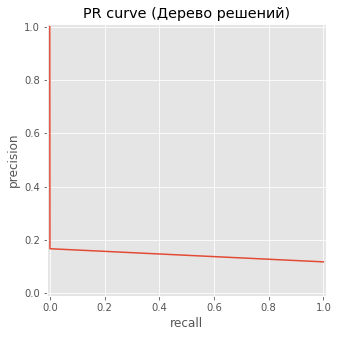

In [61]:
precisionDTC, recallDTC, thresholds = precision_recall_curve(y_test, predictDTC)
plt.figure(figsize=(5, 5))
plt.plot(recallDTC, precisionDTC)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Дерево решений)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

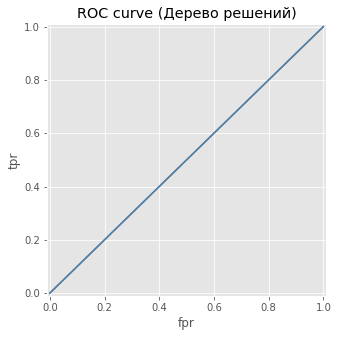

In [62]:
fprDTC, tprDTC, thresholds = roc_curve(y_test, predictDTC)

plt.figure(figsize=(5, 5))
plt.plot(fprDTC, tprDTC)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Дерево решений)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------

In [63]:
X = df_train_preproc.drop(['TARGET'], axis=1).reset_index(drop='True')
X_test = df_test_preproc.drop(['TARGET'], axis=1).reset_index(drop='True')
y = df_train_preproc['TARGET'].reset_index(drop='True')
y_test = df_test_preproc['TARGET'].reset_index(drop='True')

In [64]:
X_train, X_test_KV, y_train, y_test_KV = train_test_split(X, y, test_size=0.05)

In [65]:
# 2. Модель с алгоритммом "Случайный лес" - RandomForestClassifier
#------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [68]:
forest_params = {'max_depth': range(2, 8), 'max_features': range(2,8), \
                 'criterion': ['entropy', 'gini'], 'random_state': range(1,50)}

In [69]:
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

In [70]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3528 candidates, totalling 17640 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 846 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 1546 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3546 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4846 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6346 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 8046 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 9946 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 12046 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 14346 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 16846 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 17640 out of 17640 | elapsed:  9.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 8), 'max_features': range(2, 8), 'criterion': ['entropy', 'gini'], 'random_state': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [71]:
forest_grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 5, 'random_state': 43}

In [72]:
forest_grid.best_score_

0.8814051587027176

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [74]:
predictForest = forest_grid.predict(X_test)

In [75]:
k0 = 0
k1 = 0
all = 0
for value in predictForest:
    if value == 0:
        k0 +=1
    elif value == 1:
        k1 +=1
    all += 1
print ('predictForest')
print ('нулей: ', k0)
print ('единиц: ', k1, '(', k1*100/all, '% )')
print ('всего: ', all)

predictForest
нулей:  14907
единиц:  3 ( 0.02012072434607646 % )
всего:  14910


In [76]:
print('accurancy - ', accuracy_score(y_test, predictForest))
print('precision - ', precision_score(y_test, predictForest))
print('recall - ', recall_score(y_test, predictForest))
print('f1 - ', f1_score(y_test, predictForest))

accurancy -  0.8824279007377599
precision -  0.0
recall -  0.0
f1 -  0.0


(-0.01, 1.01)

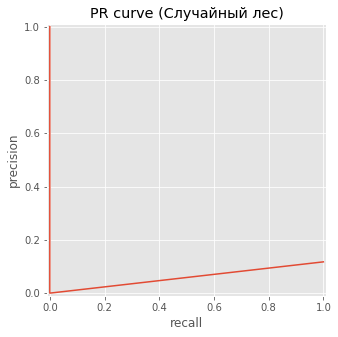

In [77]:
precisionRFC, recallRFC, thresholds = precision_recall_curve(y_test, predictForest)

plt.figure(figsize=(5, 5))
plt.plot(recallRFC, precisionRFC)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Случайный лес)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

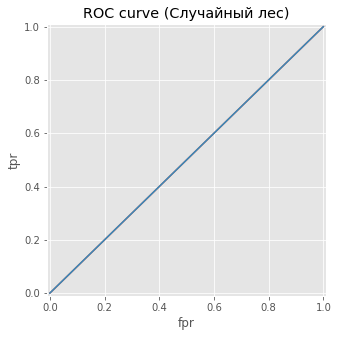

In [78]:
fprRFC, tprRFC, thresholds = roc_curve(y_test, predictForest)

plt.figure(figsize=(5, 5))
plt.plot(fprRFC, tprRFC)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Случайный лес)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------

In [79]:
X = df_train_preproc.drop(['TARGET'], axis=1).reset_index(drop='True')
X_test = df_test_preproc.drop(['TARGET'], axis=1).reset_index(drop='True')
y = df_train_preproc['TARGET'].reset_index(drop='True')
y_test = df_test_preproc['TARGET'].reset_index(drop='True')

In [80]:
X_train, X_test_KV, y_train, y_test_KV = train_test_split(X, y, test_size=0.25)

In [81]:
# 3. Модель с алгоритммом "Логистическая регрессия" - LogisticRegression
#------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [82]:
LR_params = {'fit_intercept': [True], 'class_weight': [None, 'balanced'],\
             'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],\
            'multi_class': ['ovr', 'multinomial']}

In [83]:
LR_grid = GridSearchCV(LR, LR_params, cv=5, n_jobs=-1, verbose=True)

In [84]:
LR_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.0min finished
C:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'fit_intercept': [True], 'class_weight': [None, 'balanced'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'multi_class': ['ovr', 'multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [85]:
LR_grid.best_params_

{'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'ovr',
 'solver': 'sag'}

In [86]:
LR_grid.best_score_

0.883331873521941

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [88]:
predictLR = LR_grid.predict(X_test)

In [89]:
k0 = 0
k1 = 0
all = 0
for value in predictLR:
    if value == 0:
        k0 +=1
    elif value == 1:
        k1 +=1
    all += 1
print ('predictLR')
print ('нулей: ', k0)
print ('единиц: ', k1, '(', k1*100/all, '% )')
print ('всего: ', all)

predictLR
нулей:  14910
единиц:  0 ( 0.0 % )
всего:  14910


In [90]:
print('accurancy - ', accuracy_score(y_test, predictLR))
print('precision - ', precision_score(y_test, predictLR))
print('recall - ', recall_score(y_test, predictLR))
print('f1 - ', f1_score(y_test, predictLR))

accurancy -  0.8826291079812206
precision -  0.0
recall -  0.0
f1 -  0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(-0.01, 1.01)

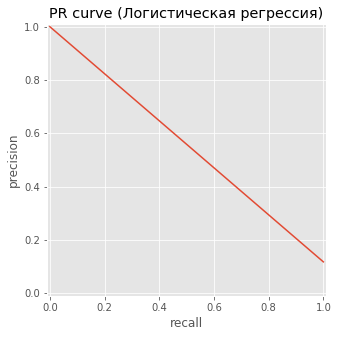

In [91]:
precisionLR, recallLR, thresholds = precision_recall_curve(y_test, predictLR)

plt.figure(figsize=(5, 5))
plt.plot(recallLR, precisionLR)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Логистическая регрессия)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

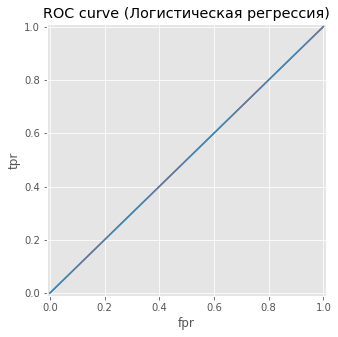

In [92]:
fprLR, tprLR, thresholds = roc_curve(y_test, predictLR)

plt.figure(figsize=(5, 5))
plt.plot(fprLR, tprLR)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Логистическая регрессия)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# Получились СОВСЕМ ПЛОХИЕ РЕЗУЛЬТАТЫ !
# После обучения модели дают почти нулевую целевую функцию (очень мало единиц предсказывают)
# Наверное, неправильно подготовил данные !?
# Возможно, вместо факторизации надо было применять OneHotEncoding !?

In [ ]:
# ---------------------------------------------------------------------------------------------

In [ ]:
# Попробуем, на всякий случай, Метод ближайших соседей !

In [ ]:
# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------

In [93]:
X = df_train_preproc.drop(['TARGET'], axis=1).reset_index(drop='True')
X_test = df_test_preproc.drop(['TARGET'], axis=1).reset_index(drop='True')
y = df_train_preproc['TARGET'].reset_index(drop='True')
y_test = df_test_preproc['TARGET'].reset_index(drop='True')

In [94]:
X_train, X_test_KV, y_train, y_test_KV = train_test_split(X, y, test_size=0.25)

In [95]:
# 4. Модель с алгоритммом "Метод ближайших соседей" - KNeighborsClassifier
#------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [ ]:
#Init signature: KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
#leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)

In [96]:
KNN_params = {'n_neighbors': range(1, 100), 'p' : range(1, 2)}

In [97]:
KNN_grid = GridSearchCV(KNN, KNN_params, cv=5, n_jobs=-1, verbose=True)

In [98]:
KNN_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed: 10.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 100), 'p': range(1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [99]:
KNN_grid.best_params_

{'n_neighbors': 19, 'p': 1}

In [100]:
KNN_grid.best_score_

0.8812297451169309

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [102]:
predictKNN = KNN_grid.predict(X_test)

In [103]:
k0 = 0
k1 = 0
all = 0
for value in predictKNN:
    if value == 0:
        k0 +=1
    elif value == 1:
        k1 +=1
    all += 1
print ('predictKNN')
print ('нулей: ', k0)
print ('единиц: ', k1, '(', k1*100/all, '% )')
print ('всего: ', all)

predictKNN
нулей:  14909
единиц:  1 ( 0.00670690811535882 % )
всего:  14910


In [104]:
print('accurancy - ', accuracy_score(y_test, predictKNN))
print('precision - ', precision_score(y_test, predictKNN))
print('recall - ', recall_score(y_test, predictKNN))
print('f1 - ', f1_score(y_test, predictKNN))

accurancy -  0.882562038900067
precision -  0.0
recall -  0.0
f1 -  0.0


(-0.01, 1.01)

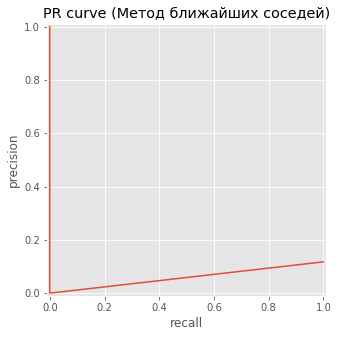

In [105]:
precisionKNN, recallKNN, thresholds = precision_recall_curve(y_test, predictKNN)

plt.figure(figsize=(5, 5))
plt.plot(recallKNN, precisionKNN)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Метод ближайших соседей)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

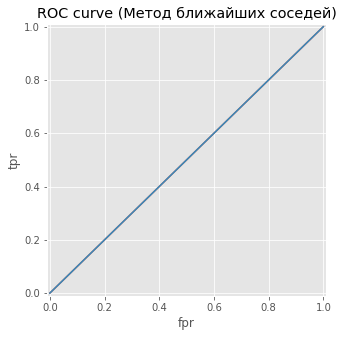

In [106]:
fprKNN, tprKNN, thresholds = roc_curve(y_test, predictKNN)

plt.figure(figsize=(5, 5))
plt.plot(fprKNN, tprKNN)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Метод ближайших соседей)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# Получились СОВСЕМ ПЛОХИЕ РЕЗУЛЬТАТЫ !

In [107]:
KNN2 = KNeighborsClassifier()

In [109]:
KNN2_params = {'n_neighbors': range(1, 5), 'p' : range(1, 2)}

In [110]:
KNN2_grid = GridSearchCV(KNN2, KNN2_params, cv=5, n_jobs=-1, verbose=True)

In [111]:
KNN2_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 5), 'p': range(1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [112]:
KNN2_grid.best_params_

{'n_neighbors': 4, 'p': 1}

In [113]:
KNN2_grid.best_score_

0.8737847070158535

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [115]:
predictKNN2 = KNN2_grid.predict(X_test)

In [116]:
k0 = 0
k1 = 0
all = 0
for value in predictKNN2:
    if value == 0:
        k0 +=1
    elif value == 1:
        k1 +=1
    all += 1
print ('predictKNN2')
print ('нулей: ', k0)
print ('единиц: ', k1, '(', k1*100/all, '% )')
print ('всего: ', all)

predictKNN2
нулей:  14752
единиц:  158 ( 1.0596914822266934 % )
всего:  14910


In [117]:
print('accurancy - ', accuracy_score(y_test, predictKNN2))
print('precision - ', precision_score(y_test, predictKNN2))
print('recall - ', recall_score(y_test, predictKNN2))
print('f1 - ', f1_score(y_test, predictKNN2))

accurancy -  0.8757880617035546
precision -  0.17721518987341772
recall -  0.016
f1 -  0.029350104821802933


(-0.01, 1.01)

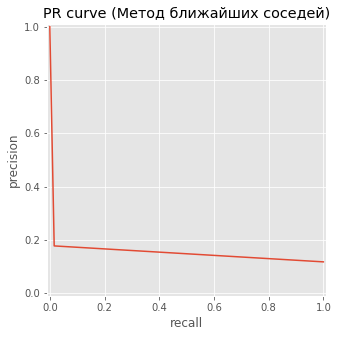

In [118]:
precisionKNN2, recallKNN2, thresholds = precision_recall_curve(y_test, predictKNN2)

plt.figure(figsize=(5, 5))
plt.plot(recallKNN2, precisionKNN2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Метод ближайших соседей)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

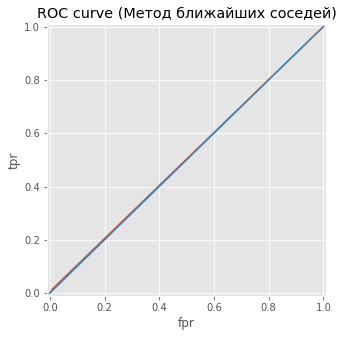

In [119]:
fprKNN2, tprKNN2, thresholds = roc_curve(y_test, predictKNN2)

plt.figure(figsize=(5, 5))
plt.plot(fprKNN2, tprKNN2)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Метод ближайших соседей)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# --------------------------------------------------------------

In [120]:
KNN3 = KNeighborsClassifier()

In [121]:
KNN3_params = {'n_neighbors': range(1, 2), 'p' : range(1, 2)}

In [122]:
KNN3_grid = GridSearchCV(KNN3, KNN3_params, cv=5, n_jobs=-1, verbose=True)

In [123]:
KNN3_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 2), 'p': range(1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [124]:
KNN3_grid.best_params_

{'n_neighbors': 1, 'p': 1}

In [125]:
KNN3_grid.best_score_

0.7929403521065078

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [127]:
predictKNN3 = KNN3_grid.predict(X_test)

In [128]:
k0 = 0
k1 = 0
all = 0
for value in predictKNN3:
    if value == 0:
        k0 +=1
    elif value == 1:
        k1 +=1
    all += 1
print ('predictKNN3')
print ('нулей: ', k0)
print ('единиц: ', k1, '(', k1*100/all, '% )')
print ('всего: ', all)

predictKNN3
нулей:  13075
единиц:  1835 ( 12.307176391683434 % )
всего:  14910


In [129]:
print('accurancy - ', accuracy_score(y_test, predictKNN3))
print('precision - ', precision_score(y_test, predictKNN3))
print('recall - ', recall_score(y_test, predictKNN3))
print('f1 - ', f1_score(y_test, predictKNN3))

accurancy -  0.7921529175050301
precision -  0.13242506811989102
recall -  0.13885714285714285
f1 -  0.13556485355648534


(-0.01, 1.01)

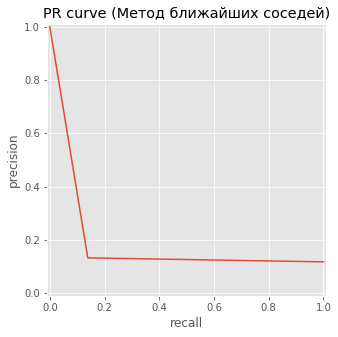

In [130]:
precisionKNN3, recallKNN3, thresholds = precision_recall_curve(y_test, predictKNN3)

plt.figure(figsize=(5, 5))
plt.plot(recallKNN3, precisionKNN3)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Метод ближайших соседей)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

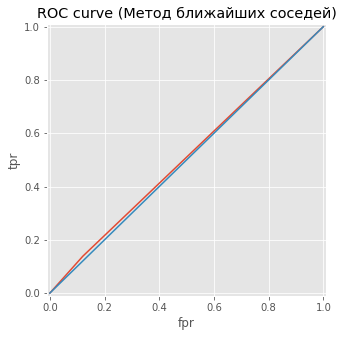

In [131]:
fprKNN3, tprKNN3, thresholds = roc_curve(y_test, predictKNN3)

plt.figure(figsize=(5, 5))
plt.plot(fprKNN3, tprKNN3)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Метод ближайших соседей)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# Получился самый лучший из УЖАСНЫХ РЕЗУЛЬТАТОВ !
# Количество прогнозируемых единиц - уже не единицы, а тысячи